In [55]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [56]:


# Read the dataset
data = pd.read_csv('D:/AbdulRehman/8th semester/ML/Assignmnet/Balaji Fast Food Sales.csv')

# Display the first few rows of the dataset
print(data.head())


   order_id        date        item_name  item_type  item_price  quantity  \
0         1  07-03-2022         Aalopuri   Fastfood        20.0      13.0   
1         2   8/23/2022          Vadapav   Fastfood        20.0      15.0   
2         3  11/20/2022          Vadapav   Fastfood        20.0       1.0   
3         4  02-03-2023  Sugarcane juice  Beverages         NaN       6.0   
4         5  10-02-2022  Sugarcane juice  Beverages        25.0       8.0   

   transaction_amount transaction_type received_by time_of_sale  
0               260.0              NaN         Mr.        Night  
1               300.0             Cash         Mr.    Afternoon  
2                20.0             Cash         Mr.    Afternoon  
3               150.0           Online         Mr.        Night  
4               200.0           Online         Mr.      Evening  


In [57]:
print(data.isnull().sum())


order_id                0
date                    0
item_name               0
item_type               0
item_price             16
quantity                5
transaction_amount      4
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64


In [58]:

# Drop NaN values
data.dropna(inplace=True)
print(data.head())

   order_id        date        item_name  item_type  item_price  quantity  \
1         2   8/23/2022          Vadapav   Fastfood        20.0      15.0   
2         3  11/20/2022          Vadapav   Fastfood        20.0       1.0   
4         5  10-02-2022  Sugarcane juice  Beverages        25.0       8.0   
5         6  11/14/2022          Vadapav   Fastfood        20.0      10.0   
6         7  05-03-2022  Sugarcane juice  Beverages        25.0       9.0   

   transaction_amount transaction_type received_by time_of_sale  
1               300.0             Cash         Mr.    Afternoon  
2                20.0             Cash         Mr.    Afternoon  
4               200.0           Online         Mr.      Evening  
5               200.0             Cash         Mr.      Evening  
6               225.0             Cash         Mr.      Evening  


In [80]:
# Separate features (x) and target variable (y)
x = data.drop(['transaction_amount', 'transaction_type'], axis=1)  # Exclude 'transaction_type'
y = data['transaction_amount']


In [81]:
print(x)

     order_id        date        item_name  item_type  item_price  quantity  \
1           2   8/23/2022          Vadapav   Fastfood        20.0      15.0   
2           3  11/20/2022          Vadapav   Fastfood        20.0       1.0   
4           5  10-02-2022  Sugarcane juice  Beverages        25.0       8.0   
5           6  11/14/2022          Vadapav   Fastfood        20.0      10.0   
6           7  05-03-2022  Sugarcane juice  Beverages        25.0       9.0   
..        ...         ...              ...        ...         ...       ...   
990       991   1/18/2023         Sandwich   Fastfood        60.0       7.0   
991       992  10/21/2022         Sandwich   Fastfood        60.0       5.0   
992       993   7/17/2022          Frankie   Fastfood        50.0       3.0   
993       994  11-01-2022         Panipuri   Fastfood        20.0       2.0   
994       995   6/18/2022  Sugarcane juice  Beverages        25.0       1.0   

    received_by time_of_sale  
1           Mr.    A

In [82]:
print(y)


1      300.0
2       20.0
4      200.0
5      200.0
6      225.0
       ...  
990    420.0
991    300.0
992    150.0
993     40.0
994     25.0
Name: transaction_amount, Length: 873, dtype: float64


In [83]:
# Identify categorical columns to be one-hot encoded
categorical_cols = ['date', 'item_name', 'item_type', 'received_by', 'time_of_sale']

In [84]:
# Create a column transformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_cols)], remainder="passthrough")


In [85]:

# Apply one-hot encoding to the features
x_encoded = ct.fit_transform(x)

In [88]:
# Now, x_encoded contains the one-hot encoded features
# You can convert it back to a DataFrame if needed
x_encoded_df = pd.DataFrame(x_encoded)

# Display the first few rows of the updated DataFrame
print(x_encoded_df.head())




                                                   0
0    (0, 315)\t1.0\n  (0, 345)\t1.0\n  (0, 347)\t...
1    (0, 166)\t1.0\n  (0, 345)\t1.0\n  (0, 347)\t...
2    (0, 120)\t1.0\n  (0, 344)\t1.0\n  (0, 346)\t...
3    (0, 160)\t1.0\n  (0, 345)\t1.0\n  (0, 347)\t...
4    (0, 46)\t1.0\n  (0, 344)\t1.0\n  (0, 346)\t1...


In [96]:
#split the dataset for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 2)


In [97]:
print(x_train)

     order_id        date    item_name  item_type  item_price  quantity  \
730       731  03-09-2023      Frankie   Fastfood        50.0      10.0   
333       334  04-04-2022  Cold coffee  Beverages        40.0       4.0   
668       669   3/18/2023     Sandwich   Fastfood        60.0      11.0   
438       439   9/30/2022      Frankie   Fastfood        50.0      13.0   
807       808   9/21/2022     Panipuri   Fastfood        20.0       1.0   
..        ...         ...          ...        ...         ...       ...   
620       621   2/13/2023     Aalopuri   Fastfood        20.0       2.0   
678       679  11-02-2022     Sandwich   Fastfood        60.0      12.0   
573       574  10/22/2022     Aalopuri   Fastfood        20.0       1.0   
611       612  02-06-2023     Aalopuri   Fastfood        20.0       3.0   
199       200  12/25/2022  Cold coffee  Beverages        40.0      10.0   

    received_by time_of_sale  
730        Mrs.    Afternoon  
333        Mrs.      Evening  
668   

In [98]:
print(x_test)

     order_id        date        item_name  item_type  item_price  quantity  \
733       734  10-07-2022          Frankie   Fastfood        50.0       7.0   
993       994  11-01-2022         Panipuri   Fastfood        20.0       2.0   
207       208   8/26/2022      Cold coffee  Beverages        40.0      13.0   
87         88  07-07-2022      Cold coffee  Beverages        40.0      10.0   
964       965  10-08-2022          Frankie   Fastfood        50.0       5.0   
..        ...         ...              ...        ...         ...       ...   
727       728  08-03-2022          Vadapav   Fastfood        20.0       1.0   
745       746  08-05-2022  Sugarcane juice  Beverages        25.0       5.0   
831       832  06-06-2022  Sugarcane juice  Beverages        25.0       4.0   
512       513   7/16/2022      Cold coffee  Beverages        40.0       5.0   
85         86  03-09-2023         Aalopuri   Fastfood        20.0      15.0   

    received_by time_of_sale  
733         Mr.     

In [99]:
print(y_train)

730    500.0
333    160.0
668    660.0
438    650.0
807     20.0
       ...  
620     40.0
678    720.0
573     20.0
611     60.0
199    400.0
Name: transaction_amount, Length: 654, dtype: float64


In [100]:
print(y_test)

733    350.0
993     40.0
207    520.0
87     400.0
964    250.0
       ...  
727     20.0
745    125.0
831    100.0
512    200.0
85     300.0
Name: transaction_amount, Length: 219, dtype: float64


In [103]:
from sklearn.preprocessing import StandardScaler

# Assuming x_train and x_test are DataFrames
# Select only numeric columns
numeric_columns = x_train.select_dtypes(include=['number']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform both the training and testing data
x_train_scaled = scaler.fit_transform(x_train[numeric_columns])
x_test_scaled = scaler.transform(x_test[numeric_columns])

In [104]:
print(x_train)

     order_id        date    item_name  item_type  item_price  quantity  \
730       731  03-09-2023      Frankie   Fastfood        50.0      10.0   
333       334  04-04-2022  Cold coffee  Beverages        40.0       4.0   
668       669   3/18/2023     Sandwich   Fastfood        60.0      11.0   
438       439   9/30/2022      Frankie   Fastfood        50.0      13.0   
807       808   9/21/2022     Panipuri   Fastfood        20.0       1.0   
..        ...         ...          ...        ...         ...       ...   
620       621   2/13/2023     Aalopuri   Fastfood        20.0       2.0   
678       679  11-02-2022     Sandwich   Fastfood        60.0      12.0   
573       574  10/22/2022     Aalopuri   Fastfood        20.0       1.0   
611       612  02-06-2023     Aalopuri   Fastfood        20.0       3.0   
199       200  12/25/2022  Cold coffee  Beverages        40.0      10.0   

    received_by time_of_sale  
730        Mrs.    Afternoon  
333        Mrs.      Evening  
668   

In [105]:
print(x_test)

     order_id        date        item_name  item_type  item_price  quantity  \
733       734  10-07-2022          Frankie   Fastfood        50.0       7.0   
993       994  11-01-2022         Panipuri   Fastfood        20.0       2.0   
207       208   8/26/2022      Cold coffee  Beverages        40.0      13.0   
87         88  07-07-2022      Cold coffee  Beverages        40.0      10.0   
964       965  10-08-2022          Frankie   Fastfood        50.0       5.0   
..        ...         ...              ...        ...         ...       ...   
727       728  08-03-2022          Vadapav   Fastfood        20.0       1.0   
745       746  08-05-2022  Sugarcane juice  Beverages        25.0       5.0   
831       832  06-06-2022  Sugarcane juice  Beverages        25.0       4.0   
512       513   7/16/2022      Cold coffee  Beverages        40.0       5.0   
85         86  03-09-2023         Aalopuri   Fastfood        20.0      15.0   

    received_by time_of_sale  
733         Mr.     

In [113]:
# Assuming 'dataset' is your DataFrame
data.drop_duplicates(inplace=True)

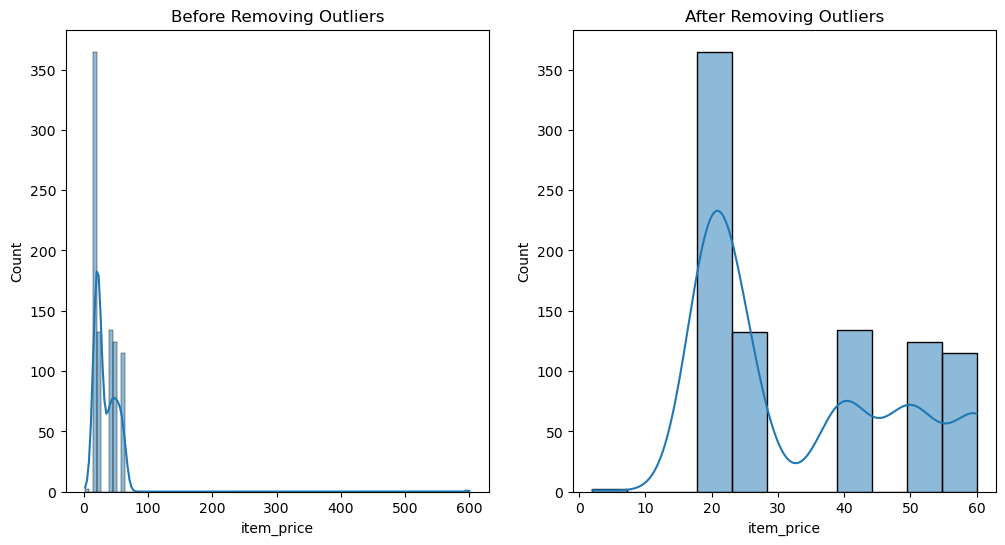

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming 'data' is your DataFrame and 'quantity' is the column for which you want to remove outliers
column_to_remove_outliers = 'item_price'
data_without_outliers = data.copy()

# Calculate the IQR (Interquartile Range)
Q1 = data_without_outliers[column_to_remove_outliers].quantile(0.05)
Q3 = data_without_outliers[column_to_remove_outliers].quantile(0.95)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_without_outliers = data_without_outliers[(data_without_outliers[column_to_remove_outliers] >= lower_bound) & (data_without_outliers[column_to_remove_outliers] <= upper_bound)]

# Plot the histogram before and after removing outliers
plt.figure(figsize=(12, 6))

# Before removing outliers
plt.subplot(1, 2, 1)
plt.title('Before Removing Outliers')
sns.histplot(data[column_to_remove_outliers], kde=True)

# After removing outliers
plt.subplot(1, 2, 2)
plt.title('After Removing Outliers')
sns.histplot(data_without_outliers[column_to_remove_outliers], kde=True)

plt.show()


In [116]:
upper_limit = data['item_price'].quantile(0.95)
lower_limit = data['item_price'].quantile(0.05)

print(f"Upper Limit: {upper_limit}")
print(f"Lower Limit: {lower_limit}")

Upper Limit: 60.0
Lower Limit: 20.0
